In [1]:
import re
import string
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(suppress=True)

In [3]:
file = open("Text_sample.txt")
text = file.read()
file.close()

In [4]:
data = re.sub("[^a-z0-9'’\- \n]+", "", text.lower())
data = re.sub(r"['’\-\n]+", " ", data)

In [5]:
clean_data = []
for w in data.split():
    if len(w)> 1 or w == "a" or w.isdigit():
        clean_data.append(w)

## Words' length distribution

In [6]:
word_length_count = {}
for w in clean_data:
    if word_length_count.get(len(w), None) == None:
        word_length_count[len(w)] = 1
    else:
        word_length_count[len(w)] += 1

In [7]:
sorted_word_length_count = dict(sorted(word_length_count.items()))

In [8]:
total_word_length_count = sum(sorted_word_length_count.values())

word_length_count_prob = []

for k,v in sorted_word_length_count.items():
    word_length_count_prob.append(v / total_word_length_count)

In [9]:
cdf_val = 0

word_length_count_cdf = []

for v in word_length_count_prob:
    cdf_val += v
    word_length_count_cdf.append(cdf_val)

In [10]:
words_length_dist = np.array([list(sorted_word_length_count.keys()), list(sorted_word_length_count.values()), word_length_count_prob, word_length_count_cdf]).T

In [11]:
words_length_dist

array([[ 1.        , 19.        ,  0.04269663,  0.04269663],
       [ 2.        , 72.        ,  0.16179775,  0.20449438],
       [ 3.        , 64.        ,  0.14382022,  0.34831461],
       [ 4.        , 69.        ,  0.15505618,  0.50337079],
       [ 5.        , 44.        ,  0.0988764 ,  0.60224719],
       [ 6.        , 30.        ,  0.06741573,  0.66966292],
       [ 7.        , 33.        ,  0.0741573 ,  0.74382022],
       [ 8.        , 16.        ,  0.03595506,  0.77977528],
       [ 9.        , 44.        ,  0.0988764 ,  0.87865169],
       [10.        , 20.        ,  0.04494382,  0.92359551],
       [11.        , 16.        ,  0.03595506,  0.95955056],
       [12.        ,  8.        ,  0.01797753,  0.97752809],
       [13.        ,  8.        ,  0.01797753,  0.99550562],
       [14.        ,  2.        ,  0.00449438,  1.        ]])

## Characters' frequency distribution

In [12]:
char_count = {}
for c in " ".join(clean_data):
    if c == ' ':
        continue
    if char_count.get(c, None) == None:
        char_count[c] = 1
    else:
        char_count[c] += 1

In [13]:
sorted_char_count = dict(sorted(char_count.items()))

In [14]:
total_chars_count = sum(sorted_char_count.values())

char_count_prob = []

for k,v in sorted_char_count.items():
    char_count_prob.append(v / total_chars_count)

In [15]:
cdf_val = 0

char_count_cdf = []

for v in char_count_prob:
    cdf_val += v
    char_count_cdf.append(cdf_val)

In [16]:
chars_freq_dist = np.array([list(sorted_char_count.keys()), list(sorted_char_count.values()), char_count_prob, char_count_cdf]).T

In [17]:
chars_freq_dist

array([['0', '2', '0.0008368200836820083', '0.0008368200836820083'],
       ['1', '1', '0.00041841004184100416', '0.0012552301255230125'],
       ['2', '1', '0.00041841004184100416', '0.0016736401673640166'],
       ['3', '1', '0.00041841004184100416', '0.0020920502092050207'],
       ['5', '1', '0.00041841004184100416', '0.002510460251046025'],
       ['6', '2', '0.0008368200836820083', '0.0033472803347280333'],
       ['8', '1', '0.00041841004184100416', '0.0037656903765690376'],
       ['a', '228', '0.09539748953974896', '0.099163179916318'],
       ['b', '22', '0.009205020920502092', '0.10836820083682008'],
       ['c', '83', '0.03472803347280335', '0.14309623430962343'],
       ['d', '75', '0.03138075313807531', '0.17447698744769874'],
       ['e', '240', '0.100418410041841', '0.27489539748953973'],
       ['f', '61', '0.025523012552301255', '0.300418410041841'],
       ['g', '71', '0.029707112970711297', '0.33012552301255227'],
       ['h', '85', '0.03556485355648536', '0.3656903

## Words generation

In [18]:
words = []

for _ in range(5000):
    rnd_val = np.random.rand()
    min_val = 10000000
    word_length = 0
    
    for w in words_length_dist:
        if min_val > w[3] and w[3] > rnd_val:
            min_val = w[3]
            word_length = int(w[0])


    word = ""
    for _ in range(word_length):
        rnd_val = np.random.rand()
        min_val = 10000000
        char = ""

        for c in chars_freq_dist:
            if min_val > float(c[3]) and float(c[3]) > rnd_val:
                min_val = float(c[3])
                char = c[0]

        word += char


    words.append(word)

In [19]:
file = open("Gnerated_Text.txt", "w")
file.write(" ".join(words))
file.close()

## Generated words' length distribution

In [20]:
gen_word_length_count = {}
for w in words:
    if gen_word_length_count.get(len(w), None) == None:
        gen_word_length_count[len(w)] = 1
    else:
        gen_word_length_count[len(w)] += 1

In [21]:
sorted_gen_word_length_count = dict(sorted(gen_word_length_count.items()))

In [22]:
total_word_length_count = sum(sorted_gen_word_length_count.values())

gen_word_length_count_prob = []

for k,v in sorted_gen_word_length_count.items():
    gen_word_length_count_prob.append(v / total_word_length_count)

In [23]:
gen_word_length_dist = np.array([list(sorted_gen_word_length_count.keys()), list(sorted_gen_word_length_count.values()), gen_word_length_count_prob]).T

In [24]:
gen_word_length_dist

array([[  1.    , 208.    ,   0.0416],
       [  2.    , 838.    ,   0.1676],
       [  3.    , 758.    ,   0.1516],
       [  4.    , 771.    ,   0.1542],
       [  5.    , 499.    ,   0.0998],
       [  6.    , 339.    ,   0.0678],
       [  7.    , 365.    ,   0.073 ],
       [  8.    , 166.    ,   0.0332],
       [  9.    , 475.    ,   0.095 ],
       [ 10.    , 186.    ,   0.0372],
       [ 11.    , 180.    ,   0.036 ],
       [ 12.    ,  92.    ,   0.0184],
       [ 13.    , 100.    ,   0.02  ],
       [ 14.    ,  23.    ,   0.0046]])

In [25]:
colors = [plt.cm.tab10(i) for i in range(2)]

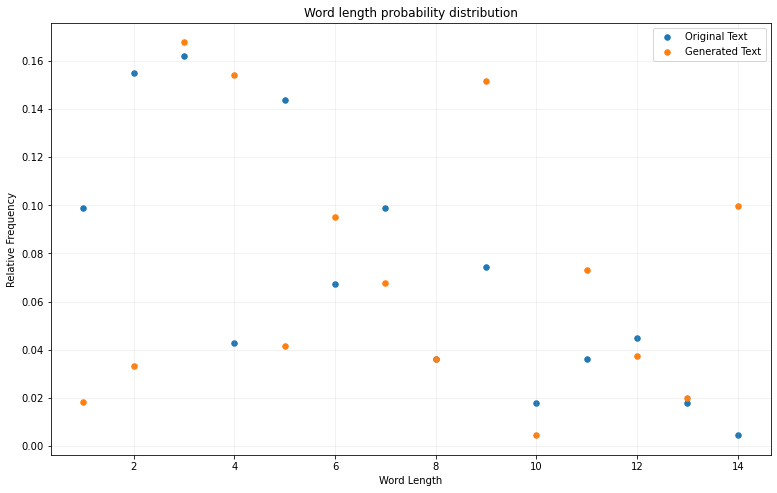

In [26]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0,0,1,1])

ax.scatter(word_length_count.keys(), word_length_count_prob, s=30, color=colors[0], label="Original Text")
ax.scatter(gen_word_length_count.keys(), gen_word_length_count_prob, s=30, color=colors[1], label="Generated Text")

ax.set(xlabel="Word Length", ylabel="Relative Frequency", title="Word length probability distribution")
ax.grid(alpha = 0.2)
ax.legend()

In [27]:
fig.savefig("Word_Length.png", 
            dpi=100, 
            bbox_inches ="tight",
            pad_inches = 0.5,
            facecolor ="w")